In [39]:
#9.08
import pandas as pd 
import json

with open('/Users/ralagianambi/Desktop/training_grade prediction.json') as f:
    data = [json.loads(line) for line in f]
    data.remove(data[0])
    train_df = pd.DataFrame(data).fillna(0)
    
train_df.head()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,8.0,7.0,3.0,4,6,195490,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,3,3,190869,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,1,2,3111,0.0,0.0,0.0,0.0,0.0
3,8.0,7.0,6.0,7,7,47738,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,3,2,85520,0.0,0.0,0.0,0.0,0.0


In [40]:
len(train_df)

79465

In [41]:
train_set=train_df[['Physics', 'Chemistry', 'PhysicalEducation', 'English','Biology','Accountancy','BusinessStudies','Economics','ComputerScience']]




In [42]:
train_set.head()

,Physics,Chemistry,PhysicalEducation,English,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,8.0,7.0,3.0,4,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,1,0.0,0.0,0.0,0.0,0.0
3,8.0,7.0,6.0,7,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,0.0


In [43]:
X_train=train_set.values

In [44]:
y_train=train_df['Mathematics'].values

In [45]:
y_train

array([6, 3, 2, ..., 5, 1, 2])

In [46]:
#Random forest regressor

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
# num_lines = int(input())
# inputs = [json.loads(input()) for _ in range(num_lines)]
# test_df = pd.DataFrame(inputs).fillna(0)

In [47]:
#for now i am using a sample test data available on the hackerrank website

with open('/Users/ralagianambi/Desktop/test_data_grade missing.txt') as f_test:
    test_data = [json.loads(line) for line in f_test]
    test_data.remove(test_data[0])
    test_df = pd.DataFrame(test_data).fillna(0)
    
test_df.head()

# deleted this last row from the file '/Users/ralagianambi/Desktop/test_data_grade missing.txt': 
# {"Physics":4,"Chemistry":5,"PhysicalEducation":4,"English":5,"serial":14158}

JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [29]:
len(test_df)

69530

In [16]:
X_test=test_df[['Physics', 'Chemistry', 'PhysicalEducation', 'English','Biology','Accountancy','BusinessStudies','Economics','ComputerScience']]

In [18]:
X_test.head()

,Physics,Chemistry,PhysicalEducation,English,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,2.0,2.0,0.0,1,1.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,4,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,1,0.0,1.0,1.0,3.0,0.0
3,2.0,2.0,0.0,1,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,2,0.0,5.0,4.0,3.0,0.0


In [20]:
X_test_arr=X_test.values

In [21]:
y_predict=regr.predict(X_test_arr)

In [25]:
y_predict.shape

(69530,)

In [32]:
y_predict=y_predict.reshape(69530, 1)

In [22]:
ytest=pd.read_csv('/Users/ralagianambi/Desktop/y_test_missing grade.txt')
y_test=ytest.values

In [30]:
len(ytest)

69529

In [26]:
y_test.shape

(69529, 1)

In [27]:
y_test

array([[4],
       [1],
       [2],
       ...,
       [4],
       [8],
       [5]])

ValueError: x and y must have same first dimension, but have shapes (69530,) and (69529, 1)

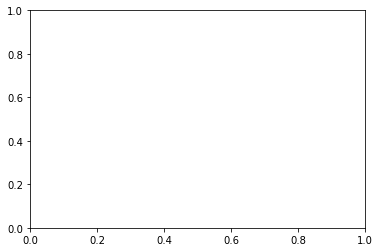

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(y_predict, y_test)

In [1]:
import os
os.getcwd()

'/Users/ralagianambi'